In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *

## Getting Data

Contains the following 6 fields:

* target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
* ids: The id of the tweet ( 2087)
* date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)
* flag: The query (lyx). If there is no query, then this value is NO_QUERY.
* user: the user that tweeted (robotickilldozr)
* text: the text of the tweet (Lyx is cool)

In [2]:
columns  = ["sentiment", "ids", "date", "flag", "user", "text"]
df = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding = "ISO-8859-1", names = columns)
df.head()

,sentiment,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
df.shape

(1600000, 6)

In [4]:
len(df['user'].unique())

659775

<Axes: title={'center': 'Ratio of sentiment label'}, ylabel='Counts'>

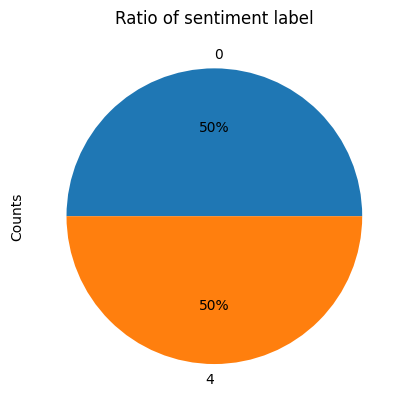

In [5]:
df.groupby(['sentiment']).size().plot(kind='pie',ylabel='Counts', autopct='%1.0f%%', title='Ratio of sentiment label')

There are two type of sentiment - 0 for negative and 4 for positive in this dataset.

### Weighted sampling the data

In [6]:
dataText = df.groupby('sentiment')[['sentiment', 'text']].sample(n=70000, random_state=1)
dataText.reset_index(inplace=True)

In [7]:
dataText

,index,sentiment,text
0,670935,0,"@TheRealScarab PA system bugs are a bummer, so..."
1,649589,0,oh daaamnnn! the firemen ball's on the 14th an...
2,2028,0,"I don't want to be cold in April, but I am"
3,669856,0,@JaredOngie haha its too cold down here bt ot...
4,458897,0,Upset I can't find my CHI!
...,...,...,...
139995,860453,4,@lynnnein Lmao I think I'll always have growin...
139996,1070764,4,"@marinavorobyev no doubt, we have to support e..."
139997,978520,4,"now on, gonna have a word of the day todays w..."
139998,1502159,4,@LolaHedoOnline awful and sweaty are two of my...


<Axes: xlabel='sentiment'>

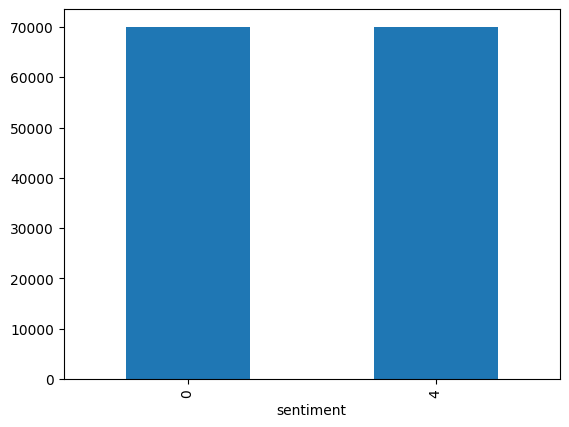

In [8]:
dataText.groupby(['sentiment']).size().plot(kind='bar')

## Preprocessing text

#### Checking for null values

In [9]:
dataText.isnull().any()

index        False
sentiment    False
text         False
dtype: bool

#### WordCloud

In [10]:
# !pip install wordcloud

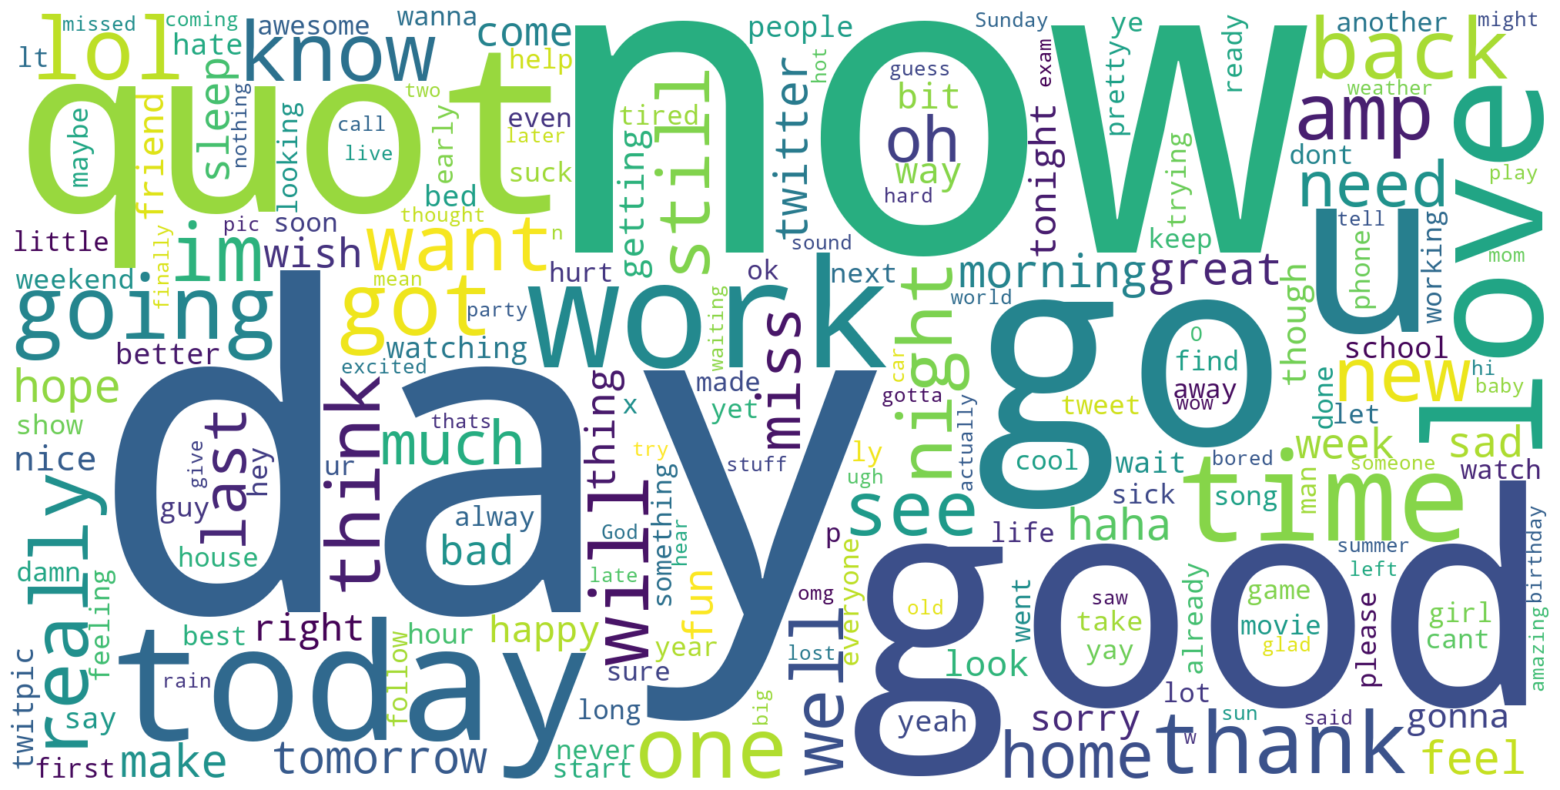

In [11]:
from wordcloud import WordCloud
plt.figure(figsize=(20,10))
#Creating the text variable
textBeforePre = " ".join(cat for cat in dataText.text)
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white', width=2000, height=1000).generate(textBeforePre)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [14]:
dataText['target'] = dataText['sentiment'].apply(lambda x : x if x==0 else 1)

<Axes: xlabel='target'>

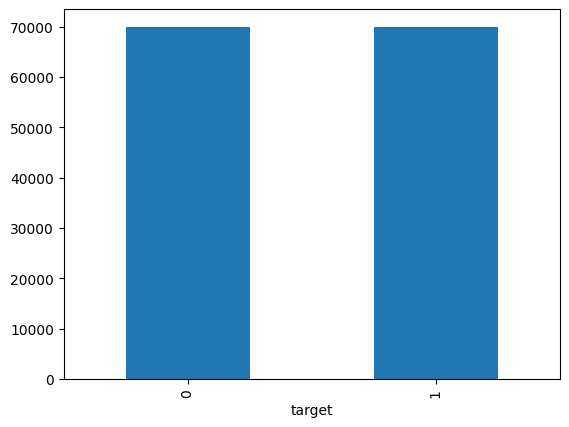

In [15]:
dataText.groupby(['target']).size().plot(kind='bar')

In [16]:
dataText.shape

(140000, 4)

### Preprocessing Methods

We have taken the following data preprocessing steps into consideration:

* **Lower Casing**: Each text is converted to lowercase.
* **Removing URLs**: Links starting with 'http' or 'https' or 'www' are replaced by space.
* **Removing Usernames**: Replace @Usernames with word space.
* **Replacing Emojies** : replace all emojis from the emoji shortcodes [eg: 👍 to 'thumbs up']
* **Replacing the chat words and numbers** : replace all chat abrevations from the normal words [eg: lol to 'laugh out loud' and 1 to one]
* **Replacing Contractions**: Replacing contractions with their meanings. [eg: "can't" to 'can not']
* **Removing Puntuations**: Replacing characters other than Digits, Alphabets and pre-defined Symbols with a space.
* **Lemmatization** and replacing **Consecutive letters**: lemmatizing the words and replacing 3 or more consecutive letters are replaced by 1 letters. [eg: 'damnnnnnn' to 'damn']
* **Replacing mistake of spellings** : correcting the spelling mistakes. [eg. caar to car]
* **Removing stopwords** : words which are not meaningful to the sentiment of the sentence.

In [ ]:
dataText['processedText'] = dataText['text'].apply(preprocessingText)

In [17]:
dataText

,index,sentiment,text,target
0,670935,0,"@TheRealScarab PA system bugs are a bummer, so...",0
1,649589,0,oh daaamnnn! the firemen ball's on the 14th an...,0
2,2028,0,"I don't want to be cold in April, but I am",0
3,669856,0,@JaredOngie haha its too cold down here bt ot...,0
4,458897,0,Upset I can't find my CHI!,0
...,...,...,...,...
139995,860453,4,@lynnnein Lmao I think I'll always have growin...,1
139996,1070764,4,"@marinavorobyev no doubt, we have to support e...",1
139997,978520,4,"now on, gonna have a word of the day todays w...",1
139998,1502159,4,@LolaHedoOnline awful and sweaty are two of my...,1


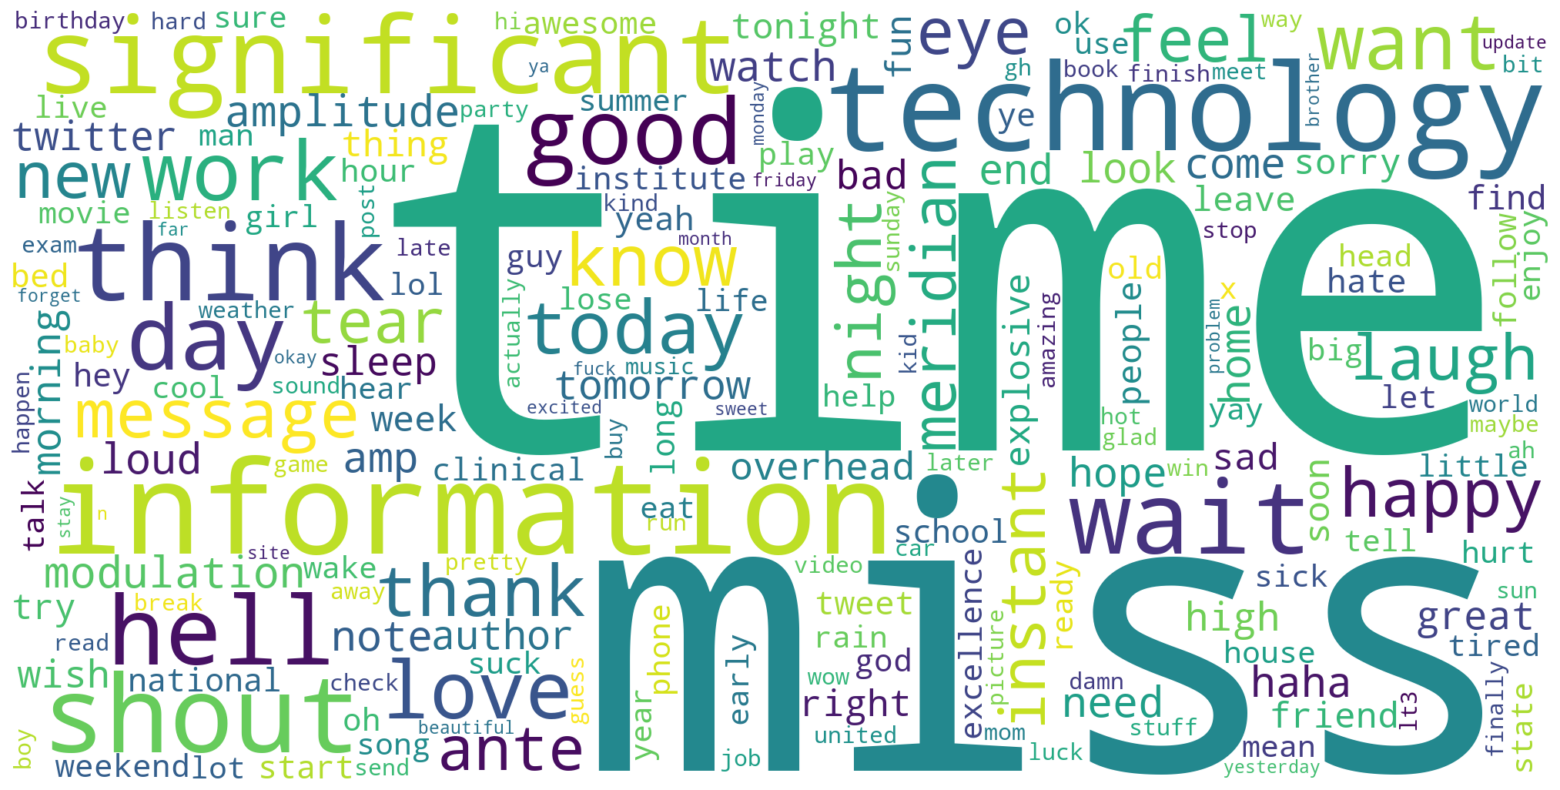

In [32]:
from wordcloud import WordCloud
plt.figure(figsize=(20,10))
#Creating the text variable
textAfterPre = " ".join(cat for cat in dataText['processedText'])
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white', width=2000, height=1000).generate(textAfterPre)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [22]:
dataText.to_pickle('preprocessedtext.pkl')

In [31]:
dataPreprocessed = pd.read_pickle("preprocessedtext.pkl")
dataPreprocessed

,index,sentiment,text,target,processedText
0,670935,0,"@TheRealScarab PA system bugs are a bummer, so...",0,personal assistant system bugs summer sorry
1,649589,0,oh daaamnnn! the firemen ball's on the 14th an...,0,overhead damn firemen ball 14th I cannes signi...
2,2028,0,"I don't want to be cold in April, but I am",0,I want time cold april I ante meridian amplitu...
3,669856,0,@JaredOngie haha its too cold down here bt ot...,0,haha I think think cold instant message fine s...
4,458897,0,Upset I can't find my CHI!,0,upset I find miss chi
...,...,...,...,...,...
139995,860453,4,@lynnnein Lmao I think I'll always have growin...,1,laugh ass I think I grow pains grow
139996,1070764,4,"@marinavorobyev no doubt, we have to support e...",1,doubt time support
139997,978520,4,"now on, gonna have a word of the day todays w...",1,word day todays word hmm apocalypse
139998,1502159,4,@LolaHedoOnline awful and sweaty are two of my...,1,awful sweat miss favorite things lime face
